# PROBLEM STATEMENT

You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small). 

DATA SOURCE: https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html

# LIBRARIES IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('dataset/Tshirt_Sizing_Dataset.csv')

In [3]:
dataset.describe()

,Height (in cms),Weight (in kgs)
count,18.00000,18.000000
mean,164.00000,62.333333
std,4.32503,2.634611
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.500000
75%,168.00000,64.000000
max,170.00000,68.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Height (in cms)  18 non-null     int64 
 1   Weight (in kgs)  18 non-null     int64 
 2   T Shirt Size     18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
dataset.head(10)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [6]:
dataset.isnull().sum()

Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64

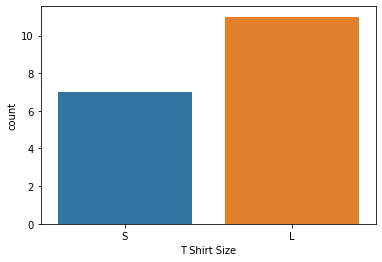

In [7]:
sns.countplot(dataset['T Shirt Size'])

# CREATE TESTING AND TRAINING DATASET

In [8]:
X = dataset.drop(['T Shirt Size'], axis = 1).values
y = dataset['T Shirt Size'].values

print(X)
print(y)

[[158  58]
 [158  59]
 [158  63]
 [160  59]
 [160  60]
 [163  60]
 [163  61]
 [160  64]
 [163  64]
 [165  61]
 [165  62]
 [165  65]
 [168  62]
 [168  63]
 [168  66]
 [170  63]
 [170  64]
 [170  68]]
['S' 'S' 'S' 'S' 'S' 'S' 'S' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
y = encoder.fit_transform(y)

print(y)

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13, 2) (13,)
(5, 2) (5,)


# MODEL TRAININ

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# MODEL TESTING

In [14]:
y_predict = classifier.predict(X_test)

print(y_predict)

[0 1 1 0 1]


In [15]:
from sklearn.metrics import confusion_matrix

        Pred:0  Pred:1
True:0       2       0
True:1       0       3


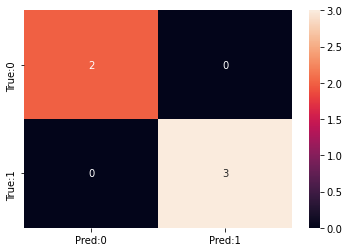

In [16]:
cm = confusion_matrix(y_test, y_predict)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True)

# TESTING RESULTS VISUALIZATION

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


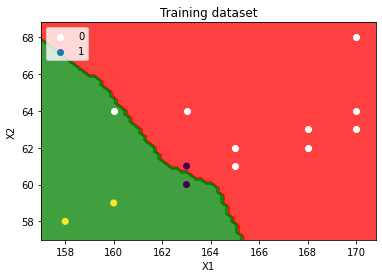

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.2),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.2))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('white', 'blue'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


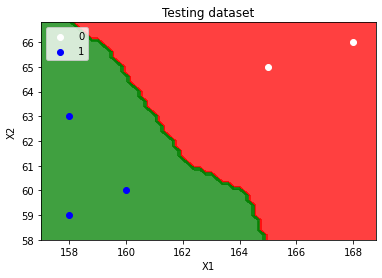

In [21]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.2),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.2))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('white', 'blue'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()